# Homework 2: Supervised Learning: Regression: Decision Tree

+ Explain the problem
+ Explain the AI Model & Data
+ Explain/Analysis the results

### Explain the problem:

The goal is to create a set of *human-interpretable* rules to tell wines apart*

### Data Source:

The data will be retrieved from sklearn simple data sets (data is clean and tidy)

This is one project I build when studied at AI Academy (NCSU.edu)


## 1) Exploratory Data Analyst:


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import datasets # dataset for this report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # For split the train and test set
from sklearn.metrics import accuracy_score

test_data_fraction = 0.2

In [5]:
wine_sk = datasets.load_wine()

# Make sure data is in the same range (normalization)
wine_sk.data = MinMaxScaler().fit_transform(wine_sk.data)

wine_sk.data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [6]:
# Since this is supervised learning
# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names']+['target'])

In [7]:
# Validate the transform data
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [33]:
wine_sk["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## 2) AI Model: Decision Tree

In [11]:
# Building the tree
# Grab all the columns except the last one
wine_features = wine_data.iloc[:,0:-1]

# Grab the last column
wine_labels = wine_data["target"]

# Then split the X and Y datasets into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction)

In [13]:
# Let validate the data again
print(f"Training Shape: X_train:{X_train.shape}, Y_train:{Y_train.shape}")
print(f"Testing Shape: X_test:{X_test.shape}, Y_test:{Y_test.shape}")

Training Shape: X_train:(142, 13), Y_train:(142,)
Testing Shape: X_test:(36, 13), Y_test:(36,)


In [24]:
# Train a decision tree, plot it, and calculate its accuracy.
gini_tree = DecisionTreeClassifier (random_state=0)
gini_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

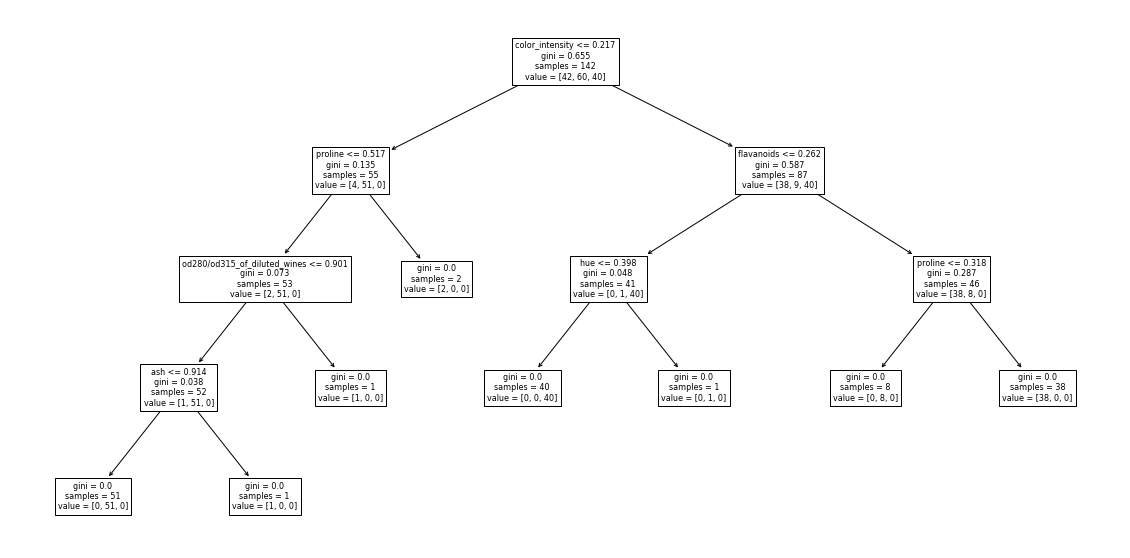

In [31]:
# We can plot the resulting tree using plot tree from sklearn
plt.figure(figsize=(20,10)) # create a figure size 20 and 10
_ = plot_tree(gini_tree, feature_names=wine_features.columns)

In [34]:
print(f'Train Accuracy: {accuracy_score(Y_train, gini_tree.predict(X_train))}')
print(f'Test Accuracy: {accuracy_score(Y_test, gini_tree.predict(X_test))}')

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


## 3) Explain the Analyst

**Result:** Result show an accuracy score of 92% on the training test and 94% on the test set:

**Explain**:
Go down the decison tree. The left side of the tree is yes, and the right side is no. 
- Example 1: visit the root of the tree, then go left, then go left again: wine classify as 1. Explain: If a wine has a color_intensity less than 0.217 (root: choose yes) and proline less than 0.517 (first left: choose yes), it has more than 93% to be wine class 1 (at second left).
- Example 2: visit the root of the tree, then go right, another right, and another right: wine classify as type 0. Explain: If a wine has a color_intensity more than 0.217(root: choose no), and flavanoid more than 0.262 (first right: choose no) and proline more than 0.318 (second right: choose no). It has 100 % change to classify as wine type 0 (at third right).

Any one can look at the pics and do a quick classification base on the citeria